In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

Using Theano backend.
/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
data_path='/users/mtaranov/NN_all_data/'

X_train = get_features('/users/mtaranov/NN_all_data/less_than_1Mb/train_set_upperTriangle_noDiag_reads_less_1Mb.npy')
y_train = get_labels('/users/mtaranov/NN_all_data/less_than_1Mb/labels_train_upperTriangle_noDiag_reads_less_1Mb.npy')
X_valid = get_features('/users/mtaranov/NN_all_data/less_than_1Mb/vali_set_upperTriangle_noDiag_reads_less_1Mb.npy')
y_valid = get_labels('/users/mtaranov/NN_all_data/less_than_1Mb/labels_vali_upperTriangle_noDiag_reads_less_1Mb.npy')
X_test = get_features('/users/mtaranov/NN_all_data/less_than_1Mb/test_set_upperTriangle_noDiag_reads_less_1Mb.npy')
y_test = get_labels('/users/mtaranov/NN_all_data/less_than_1Mb/labels_test_upperTriangle_noDiag_reads_less_1Mb.npy')

"""
X_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')
X_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')
X_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')

X_train = get_features('NN_datasets/train_set_all_reads.npy')
y_train = get_labels('NN_datasets/labels_train_all.npy')
X_valid = get_features('NN_datasets/vali_set_all_reads.npy')
y_valid = get_labels('NN_datasets/labels_vali_all.npy')
X_test = get_features('NN_datasets/test_set_all_reads.npy')
y_test = get_labels('NN_datasets/labels_test_all.npy')

X_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)
X_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)
X_test_subsampled, y_test_subsampled = subsample_data(X_test, y_test)
"""

"\nX_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')\ny_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')\nX_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')\ny_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')\nX_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')\ny_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')\n\nX_train = get_features('NN_datasets/train_set_all_reads.npy')\ny_train = get_labels('NN_datasets/labels_train_all.npy')\nX_valid = get_features('NN_datasets/vali_set_all_reads.npy')\ny_valid = get_labels('NN_datasets/labels_vali_all.npy')\nX_test = get_features('NN_datasets/test_set_all_reads.npy')\ny_test = get_labels('NN_datasets/labels_test_all.npy')\n\nX_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)\nX_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)\nX_test_subsampled, y_test_subsampled = 

In [ ]:
"""
X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)
"""

In [4]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)


#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [5]:
dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)

In [12]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)

Training model...
Train on 16191 samples, validate on 9847 samples
Epoch 1/100
16191/16191 [==============================] - 0s - loss: 0.8368 - val_loss: 0.7289
Epoch 0: validation loss: 0.729
Balanced Accuracy: 54.85%	 auROC: 0.565	 auPRC: 0.692	 auPRG: 0.077
Recall at 5%|10%|20% FDR: 0.2%|0.2%|1.4%	 Num Positives: 6292	 Num Negatives: 3555	 

Epoch 2/100
16191/16191 [==============================] - 0s - loss: 0.8394 - val_loss: 0.7472
Epoch 1: validation loss: 0.747
Balanced Accuracy: 54.61%	 auROC: 0.564	 auPRC: 0.691	 auPRG: 0.081
Recall at 5%|10%|20% FDR: 0.1%|0.1%|2.2%	 Num Positives: 6292	 Num Negatives: 3555	 

Epoch 3/100
16191/16191 [==============================] - 0s - loss: 0.8345 - val_loss: 0.7331
Epoch 2: validation loss: 0.733
Balanced Accuracy: 54.43%	 auROC: 0.563	 auPRC: 0.690	 auPRG: 0.079
Recall at 5%|10%|20% FDR: 0.2%|0.2%|1.4%	 Num Positives: 6292	 Num Negatives: 3555	 

Epoch 4/100
16191/16191 [==============================] - 0s - loss: 0.8307 - val_loss

In [14]:
print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))

Balanced Accuracy: 55.41%	 auROC: 0.572	 auPRC: 0.700	 auPRG: 0.091
Recall at 5%|10%|20% FDR: 0.1%|0.1%|2.4%	 Num Positives: 4189	 Num Negatives: 2333	 


# with genomic locations

In [16]:
dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)

In [18]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)

Training model...
Train on 16191 samples, validate on 9847 samples
Epoch 1/100
16191/16191 [==============================] - 0s - loss: 0.9225 - val_loss: 0.7026
Epoch 0: validation loss: 0.703
Balanced Accuracy: 53.31%	 auROC: 0.555	 auPRC: 0.683	 auPRG: 0.078
Recall at 5%|10%|20% FDR: 0.0%|0.0%|1.2%	 Num Positives: 6292	 Num Negatives: 3555	 

Epoch 2/100
16191/16191 [==============================] - 0s - loss: 0.9197 - val_loss: 0.7038
Epoch 1: validation loss: 0.704
Balanced Accuracy: 53.21%	 auROC: 0.556	 auPRC: 0.685	 auPRG: 0.080
Recall at 5%|10%|20% FDR: 0.1%|0.1%|1.0%	 Num Positives: 6292	 Num Negatives: 3555	 

Epoch 3/100
16191/16191 [==============================] - 0s - loss: 0.9183 - val_loss: 0.7125
Epoch 2: validation loss: 0.712
Balanced Accuracy: 53.04%	 auROC: 0.554	 auPRC: 0.682	 auPRG: 0.075
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.7%	 Num Positives: 6292	 Num Negatives: 3555	 

Epoch 4/100
16191/16191 [==============================] - 0s - loss: 0.9145 - val_loss

In [19]:
print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))

Balanced Accuracy: 54.71%	 auROC: 0.567	 auPRC: 0.695	 auPRG: 0.080
Recall at 5%|10%|20% FDR: 0.1%|0.1%|1.3%	 Num Positives: 4189	 Num Negatives: 2333	 


# Print prediction

In [241]:
indx_test=np.load('/users/mtaranov/NN_all_data/indx_test_upperTriangle_noDiag.npy')
indx_valid=np.load('/users/mtaranov/NN_all_data/indx_vali_upperTriangle_noDiag.npy')
indx_train=np.load('/users/mtaranov/NN_all_data/indx_train_upperTriangle_noDiag.npy')

In [347]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=(np.concatenate((indx_train, indx_valid, indx_test), axis=0))

labels_test = y_test
preds_test = pred_probs_test
indx_test = indx_test

In [372]:
NumberOfNodes=2272
preds_all_2d, labels_all_2d = get_2D(indx_all, preds_all, labels_all, NumberOfNodes)
preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:
Some tests on adjacency matrix:
Some tests on adjacency matrix:


1.0
(2272, 2272)
Limit: 1.0


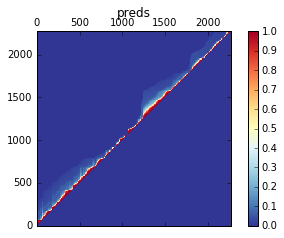

1.0
(2272, 2272)
Limit: 1.0


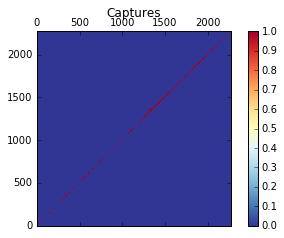

In [417]:
printMatrix(preds_all_2d, '', 1, 1, title='preds')
printMatrix(labels_all_2d, '', 1, 1, title='Captures')

1.0
(2272, 2272)
Limit: 1.0


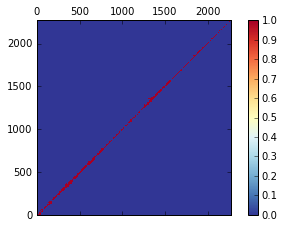

1.0
(2272, 2272)
Limit: 1.0


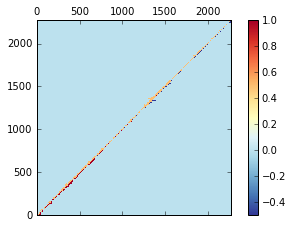

In [404]:
zoomIn_window = (0,2272)
preds_thres = 0.99
NumberOfNodes=2272
plot_prediction(preds_all_2d, labels_all_2d, zoomIn_window, preds_thres)

1.0
(200, 200)
Limit: 1.0


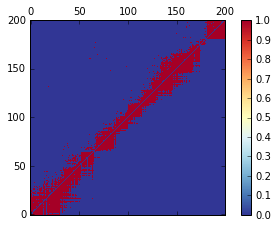

1.0
(200, 200)
Limit: 1.0


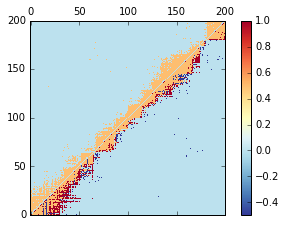

In [410]:
zoomIn_window = (0,200)
preds_thres = 0.999
NumberOfNodes=2272
plot_prediction(preds_all_2d, labels_all_2d, zoomIn_window, preds_thres)

1.0
(200, 200)
Limit: 1.0


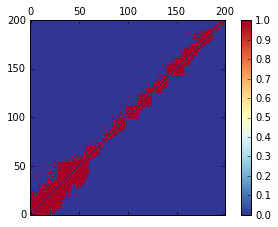

1.0
(200, 200)
Limit: 1.0


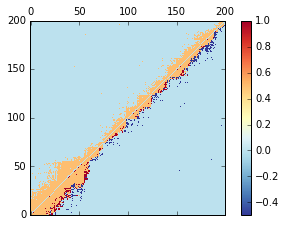

In [420]:
zoomIn_window = (1500,1700)
preds_thres = 0.98
NumberOfNodes=2272
plot_prediction(preds_all_2d, labels_all_2d, zoomIn_window, preds_thres)

1.0
(100, 100)
Limit: 1.0


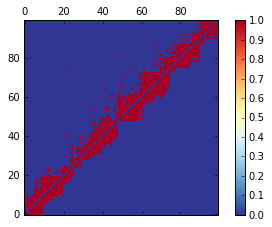

1.0
(100, 100)
Limit: 1.0


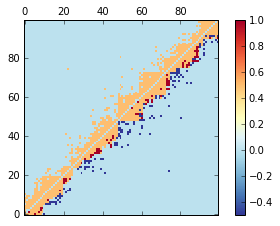

In [421]:
zoomIn_window = (1550,1650)
preds_thres = 0.98
NumberOfNodes=2272
plot_prediction(preds_all_2d, labels_all_2d, zoomIn_window, preds_thres)